## RQ1

In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

In [181]:
''' imports '''
import pandas as pd
import numpy as np
from loader import Loader
import matplotlib.pyplot as plt
%matplotlib notebook

''' data paths '''
data = {
    'jan': {
        'path': 'data/yellow_tripdata_2018-01.csv',
        'start': '2018-01-01',
        'end': '2018-01-31'
    },
    'feb': {
        'path': 'data/yellow_tripdata_2018-02.csv',
        'start': '2018-02-01',
        'end': '2018-02-28'
    },
    'mar': {
        'path': 'data/yellow_tripdata_2018-03.csv',
        'start': '2018-03-01',
        'end': '2018-03-31'
    },
    'apr': {
        'path': 'data/yellow_tripdata_2018-04.csv',
        'start': '2018-04-01',
        'end': '2018-04-30'
    },
    'may': {
        'path': 'data/yellow_tripdata_2018-05.csv',
        'start': '2018-05-01',
        'end': '2018-05-31'
    },
    'jun': {
        'path': 'data/yellow_tripdata_2018-06.csv',
        'start': '2018-06-01',
        'end': '2018-06-30'
    }
}
locations = 'data/taxi_zone_lookup.csv'

# make it dynamic
# MONTH = data['jan']
MONTHS = [(m, data[m]['path']) for m in data.keys()]

Let's use a Loader class, created ad hoc, to simplify some operations 

In [182]:
# read data for each month
loader = Loader(csv=MONTHS, chunksize=100000)

# preparing locations to be merged on-the-fly when iterating
loader.merge(csv=locations, usecols=['LocationID', 'Borough'], on=('PULocationID', 'LocationID'), direction='left', drop_on_columns=True)

# get data generator
data_iterator = loader.iterate(usecols=['tpep_pickup_datetime', 'PULocationID'], parse_dates=['tpep_pickup_datetime'], date_index='tpep_pickup_datetime')

In [186]:
''' working with each borough '''
# declaring two counters to enhance verbosity
tot_rows = 0
processed_rows = 0

# count will be stored here
# and incremented chunk by chunk
days_borough = {}

dg_bkp = {}

# iterate over chunks
for month, d in data_iterator:
    
    # info
    tot_rows += len(d.index)
    
    # remove older or newer items keeping only the ones
    # strictly related to the considered month
    d = d.loc[data[month]['start'] : data[month]['end']]
    
    # drop any row with missing values
    d = d.dropna()
    
    # we want to use tpep_pickup_datetime for data
    # aggregation and it cannot be an index
    d['Day'] = d.index.day
    d = d.reset_index()
    
    # remove useless column
    d = d.drop('tpep_pickup_datetime', axis=1)
    
    # info
    processed_rows += len(d.index)
    
    # group by Day and Borough
    dg = d[['Day', 'Borough']].groupby(['Borough', 'Day'])['Day'].size()
    
    # backing up important values
    if not month in dg_bkp: dg_bkp[month] = None
    dg_bkp[month] = dg if dg_bkp[month] is None else dg_bkp[month].add(dg, fill_value=0)
    
print(str(processed_rows) + ' over ' + str(tot_rows) + ' rows have been processed')

53622248 over 53625735 rows have been processed


In [189]:
dg_bkp['jan']['Manhattan']

Day
1          1.0
2     155602.0
3     239914.0
4     112143.0
5     241576.0
6     253800.0
7     210736.0
8     230879.0
9     257234.0
10    264515.0
11    277900.0
12    290540.0
13    295396.0
14    264422.0
15    219344.0
16    268483.0
17    281256.0
18    303093.0
19    298113.0
20    271682.0
21    226900.0
22    236629.0
23    265005.0
24    290437.0
25    304266.0
26    307778.0
27    288558.0
28    234008.0
29    241166.0
30    279035.0
31    293383.0
Name: Day, dtype: float64

Borough  Day
Bronx    1       2332.0
         2       1959.0
         3       1925.0
         4       1820.0
         5       1946.0
         6       1770.0
         7       1648.0
         8       1735.0
         9       1850.0
         10      1830.0
         11      1839.0
         12      1783.0
         13      1817.0
         14      2036.0
         15      1783.0
         16      1981.0
         17      2014.0
         18      1758.0
         19      1647.0
         20      2264.0
         21      1576.0
         22      1701.0
         23      1716.0
         24      1818.0
         25      1921.0
         26      1856.0
         27      1746.0
         28      1782.0
         29      1561.0
         30      1522.0
                 ...   
Unknown  2      30123.0
         3      31052.0
         4      25140.0
         5      32239.0
         6      31103.0
         7      27736.0
         8      30339.0
         9      31602.0
         10     29624.0
         11     27844.0
   

<IPython.core.display.Javascript object>


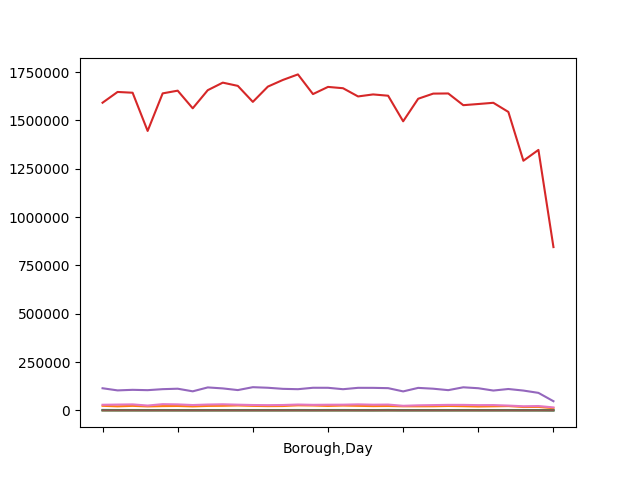

Borough
Bronx            AxesSubplot(0.125,0.11;0.775x0.77)
Brooklyn         AxesSubplot(0.125,0.11;0.775x0.77)
EWR              AxesSubplot(0.125,0.11;0.775x0.77)
Manhattan        AxesSubplot(0.125,0.11;0.775x0.77)
Queens           AxesSubplot(0.125,0.11;0.775x0.77)
Staten Island    AxesSubplot(0.125,0.11;0.775x0.77)
Unknown          AxesSubplot(0.125,0.11;0.775x0.77)
Name: Day, dtype: object

In [162]:
print(dg_bkp)

dg_bkp.groupby('Borough').plot()